In [21]:
# -*- coding: utf-8 -*-

#%% libraries
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
#%% data
url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv'
covid_df = pd.read_csv(url, index_col=0)

In [7]:
pd.set_option('display.max_columns', None)
covid_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3342 entries, 84001001 to 84056045
Columns: 1153 entries, iso2 to 3/9/23
dtypes: float64(3), int64(1144), object(6)
memory usage: 29.4+ MB


In [8]:
covid_df.
covid_df.sample(5)

,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,Combined_Key,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,5/1/20,5/2/20,5/3/20,5/4/20,5/5/20,5/6/20,5/7/20,5/8/20,5/9/20,5/10/20,5/11/20,5/12/20,5/13/20,5/14/20,5/15/20,5/16/20,5/17/20,5/18/20,5/19/20,5/20/20,5/21/20,5/22/20,5/23/20,5/24/20,5/25/20,5/26/20,5/27/20,5/28/20,5/29/20,5/30/20,5/31/20,6/1/20,6/2/20,6/3/20,6/4/20,6/5/20,6/6/20,6/7/20,6/8/20,6/9/20,6/10/20,6/11/20,6/12/20,6/13/20,6/14/20,6/15/20,6/16/20,6/17/20,6/18/20,6/19/20,6/20/20,6/21/20,6/22/20,6/23/20,6/24/20,6/25/20,6/26/20,6/27/20,6/28/20,6/29/20,6/30/20,7/1/20,7/2/20,7/3/20,7/4/20,7/5/20,7/6/20,7/7/20,7/8/20,7/9/20,7/10/20,7/11/20,7/12/20,7/13/20,7/14/20,7/15/20,7/16/20,7/17/20,7/18/20,7/19/20,7/20/20,7/21/20,7/22/20,7/23/20,7/24/20,7/25/20,7/26/20,7/27/20,7/28/20,7/29/20,7/30/20,7/31/20,8/1/20,8/2/20,8/3/20,8/4/20,8/5/20,8/6/20,8/7/20,8/8/20,8/9/20,8/10/20,8/11/20,8/12/20,8/13/20,8/14/20,8/15/20,8/16/20,8/17/20,8/18/20,8/19/20,8/20/20,8/21/20,8/22/20,8/23/20,8/24/20,8/25/20,8/26/20,8/27/20,8/28/20,8/29/20,8/30/20,8/31/20,9/1/20,9/2/20,9/3/20,9/4/20,9/5/20,9/6/20,9/7/20,9/8/20,9/9/20,9/10/20,9/11/20,9/12/20,9/13/20,9/14/20,9/15/20,9/16/20,9/17/20,9/18/20,9/19/20,9/20/20,9/21/20,9/22/20,9/23/20,9/24/20,9/25/20,9/26/20,9/27/20,9/28/20,9/29/20,9/30/20,10/1/20,10/2/20,10/3/20,10/4/20,10/5/20,10/6/20,10/7/20,10/8/20,10/9/20,10/10/20,10/11/20,10/12/20,10/13/20,10/14/20,10/15/20,10/16/20,10/17/20,10/18/20,10/19/20,10/20/20,10/21/20,10/22/20,10/23/20,10/24/20,10/25/20,10/26/20,10/27/20,10/28/20,10/29/20,10/30/20,10/31/20,11/1/20,11/2/20,11/3/20,11/4/20,11/5/20,11/6/20,11/7/20,11/8/20,11/9/20,11/10/20,11/11/20,11/12/20,11/13/20,11/14/20,11/15/20,11/16/20,11/17/20,11/18/20,11/19/20,11/20/20,11/21/20,11/22/20,11/23/20,11/24/20,11/25/20,11/26/20,11/27/20,11/28/20,11/29/20,11/30/20,12/1/20,12/2/20,12/3/20,12/4/20,12/5/20,12/6/20,12/7/20,12/8/20,12/9/20,12/10/20,12/11/20,12/12/20,12/13/20,12/14/20,12/15/20,12/16/20,12/17/20,12/18/20,12/19/20,12/20/20,12/21/20,12/22/20,12/23/20,12/24/20,12/25/20,12/26/20,12/27/20,12/28/20,12/29/20,12/30/20,12/31/20,1/1/21,1/2/21,1/3/21,1/4/21,1/5/21,1/6/21,1/7/21,1/8/21,1/9/21,1/10/21,1/11/21,1/12/21,1/13/21,1/14/21,1/15/21,1/16/21,1/17/21,1/18/21,1/19/21,1/20/21,1/21/21,1/22/21,1/23/21,1/24/21,1/25/21,1/26/21,1/27/21,1/28/21,1/29/21,1/30/21,1/31/21,2/1/21,2/2/21,2/3/21,2/4/21,2/5/21,2/6/21,2/7/21,2/8/21,2/9/21,2/10/21,2/11/21,2/12/21,2/13/21,2/14/21,2/15/21,2/16/21,2/17/21,2/18/21,2/19/21,2/20/21,2/21/21,2/22/21,2/23/21,2/24/21,2/25/21,2/26/21,2/27/21,2/28/21,3/1/21,3/2/21,3/3/21,3/4/21,3/5/21,3/6/21,3/7/21,3/8/21,3/9/21,3/10/21,3/11/21,3/12/21,3/13/21,3/14/21,3/15/21,3/16/21,3/17/21,3/18/21,3/19/21,3/20/21,3/21/21,3/22/21,3/23/21,3/24/21,3/25/21,3/26/21,3/27/21,3/28/21,3/29/21,3/30/21,3/31/21,4/1/21,4/2/21,4/3/21,4/4/21,4/5/21,4/6/21,4/7/21,4/8/21,4/9/21,4/10/21,4/11/21,4/12/21,4/13/21,4/14/21,4/15/21,4/16/21,4/17/21,4/18/21,4/19/21,4/20/21,4/21/21,4/22/21,4/23/21,4/24/21,4/25/21,4/26/21,4/27/21,4/28/21,4/29/21,4/30/21,5/1/21,5/2/21,5/3/21,5/4/21,5/5/21,5/6/21,5/7/21,5/8/21,5/9/21,5/10/21,5/11/21,5/12/21,5/13/21,5/14/21,5/15/21,5/16/21,5/17/21,5/18/21,5/19/21,5/20/21,5/21/21,5/22/21,5/23/21,5/24/21,5/25/21,5/26/21,5/27/21,5/28/21,5/29/21,5/30/21,5/31/21,6/

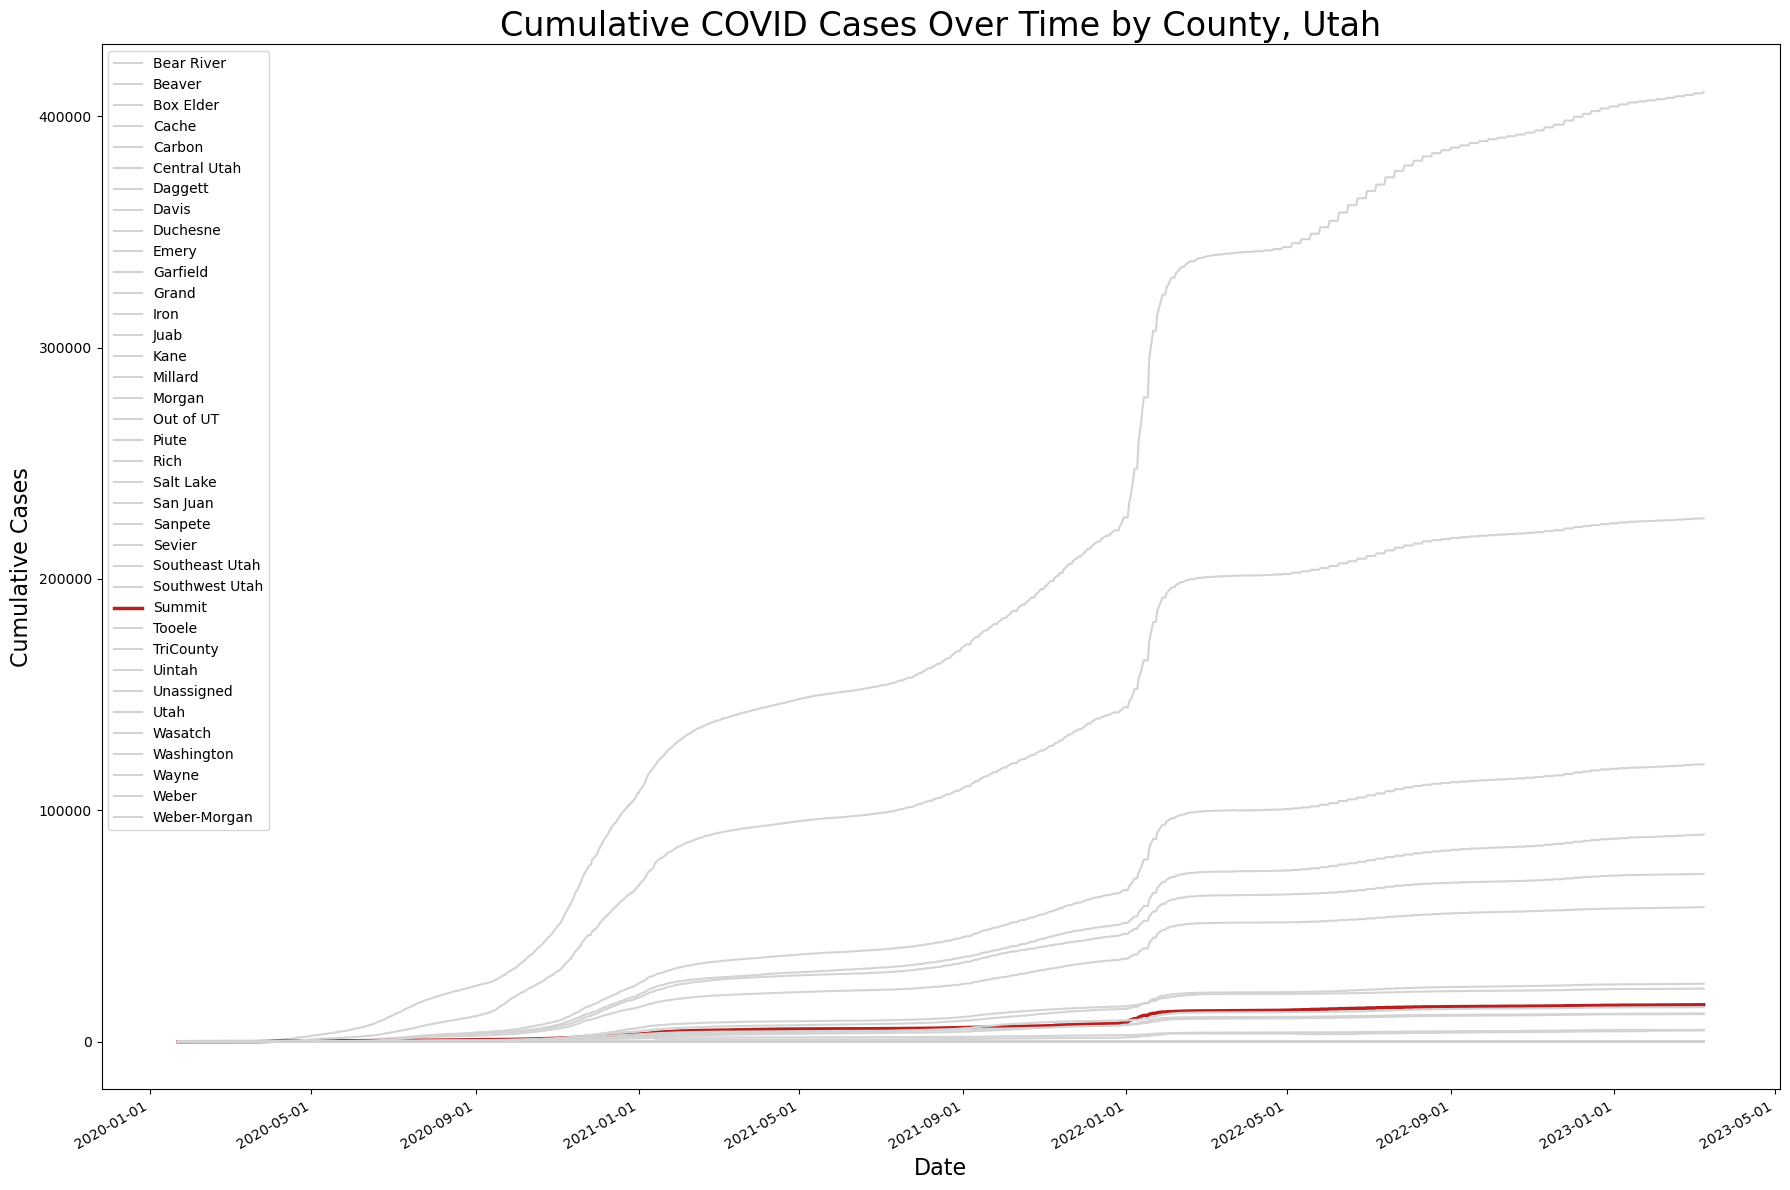

In [28]:
#%% viz 1

utah = covid_df[covid_df['Province_State'] == 'Utah'] #filter to only Utah counties
utah_counties = utah.set_index('Admin2') #set index to counties for easier graphing
utah_counties = utah_counties.drop(utah_counties.columns[0:9], axis = 1) #drop all the extra columns that don't belong in the graph
utah_counties .columns = pd.to_datetime(utah_counties .columns, format='%m/%d/%y') #the date columns were not working great so this formats them


highlight = "Summit" #pick a county to higlight

plt.figure(figsize = (18,12))
for Admin2 in utah_counties.index: #this sets up the highlighting if it is the particular county, otherwise do all the rest in grey
    if Admin2 == highlight:
        plt.plot(utah_counties.columns, utah_counties.loc[Admin2], color = 'firebrick', linewidth = 2.5, label = highlight)
    else:
        plt.plot(utah_counties.columns, utah_counties.loc[Admin2], color = 'lightgrey', linewidth = 1.5,  label = Admin2)

plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator()) #use matplotlib built in functionality to limit the dates shown on the x-axis because daily is unreadable
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gcf().autofmt_xdate() 

plt.title("Cumulative COVID Cases Over Time by County, Utah", size = 24) #title
plt.xlabel("Date", size = 16) #x-axis label
plt.ylabel("Cumulative Cases", size = 16) #y-axis label
plt.legend() # add a default legend
plt.tight_layout()
plt.show()

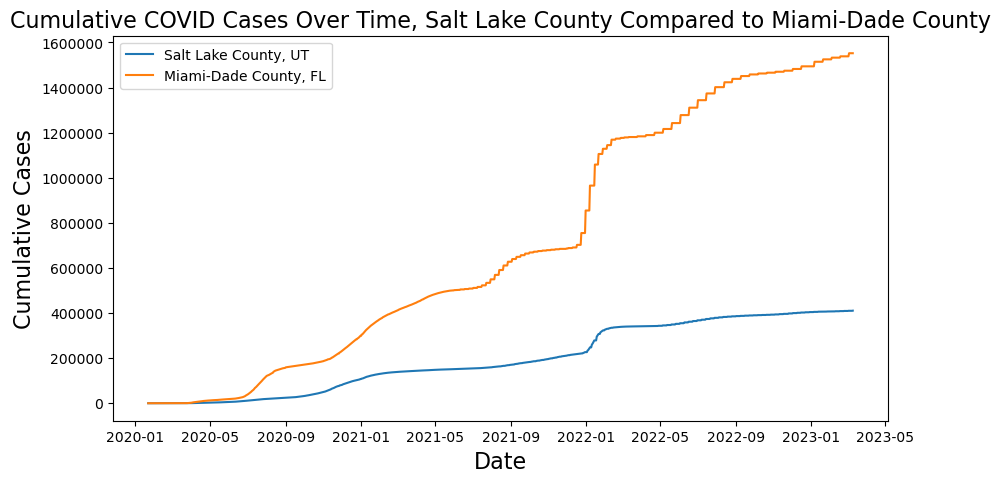

In [40]:
#%% viz 2
top_utah = utah_counties['2023-03-09'].idxmax() #find highest case count to date
top_utah #now we know it is Salt Lake

florida = covid_df[covid_df['Province_State'] == 'Florida'] #filter to only Florida counties
florida_counties = florida.set_index('Admin2') #set index to counties for easier graphing
top_fl = florida_counties['3/9/23'].idxmax() #find highest case count to date
top_fl #Now we know it is Miami-Dade

#if I had read the whole assignment in advance I would have done this more efficiently but here we are
viz2 = covid_df.set_index('Admin2')
viz2 = viz2.drop(viz2.columns[0:9], axis = 1) #drop all the extra columns that don't belong in the graph
viz2.columns = pd.to_datetime(viz2.columns, format='%m/%d/%y') #the date columns were not working great so this formats them

plt.figure(figsize = (10,5))
plt.plot(viz2.columns, viz2.loc[top_utah], label = 'Salt Lake County, UT') #plot the UT line
plt.plot(viz2.columns, viz2.loc[top_fl], label = 'Miami-Dade County, FL') #plot the FL line

plt.title("Cumulative COVID Cases Over Time, Salt Lake County Compared to Miami-Dade County", size = 16) #title
plt.xlabel("Date", size = 16) #x-axis label
plt.ylabel("Cumulative Cases", size = 16) #y-axis label
plt.ticklabel_format(style='plain', axis='y') #get it out of scientific notation
plt.legend()
plt.show()


C:\Users\u1584280\AppData\Local\Temp\ipykernel_29924\4136488572.py:24: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


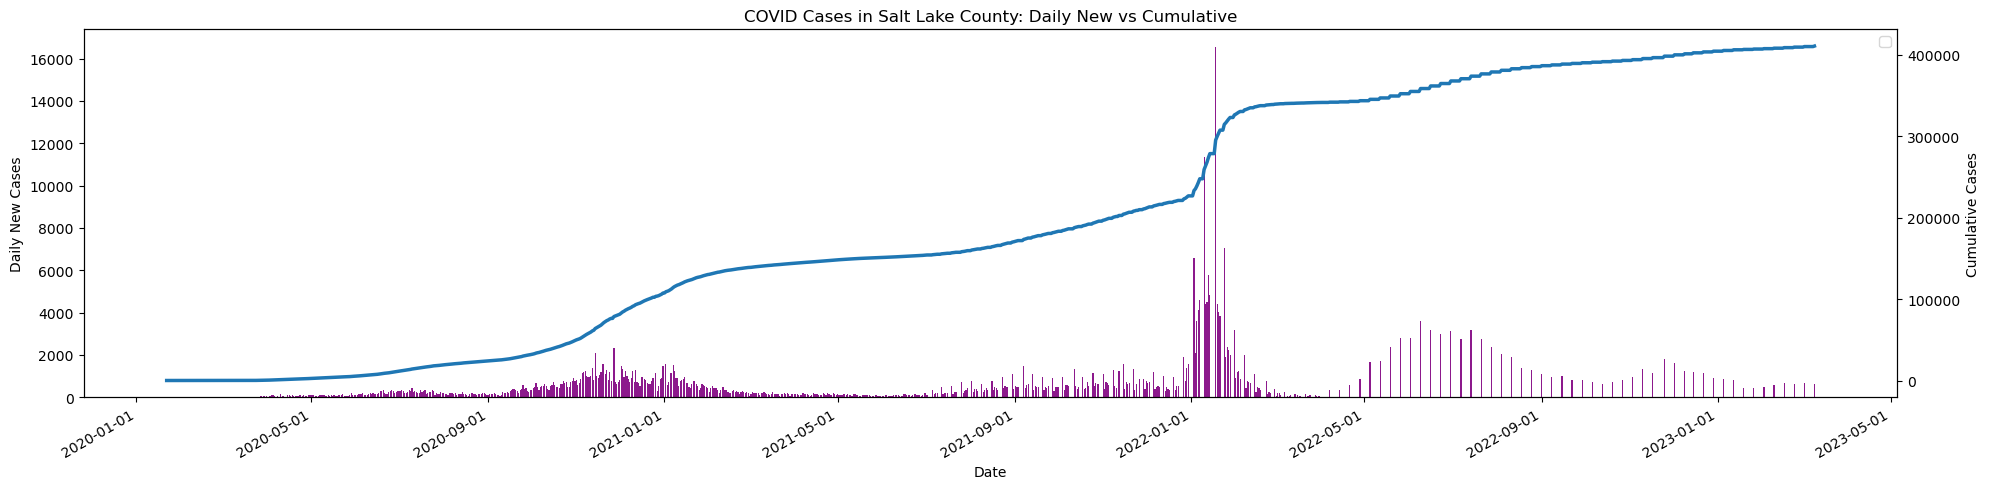

In [67]:
#%% viz 3
sl_county = utah_counties[utah_counties.index == "Salt Lake"] #filter down to just salt lake
sl_county = sl_county.T.rename(columns = {'Salt Lake':'Cumulative Cases'})#transpose dataframe
sl_county['Daily New Cases'] = sl_county['Cumulative Cases'].diff() #calculate difference for new column
sl_county['Daily New Cases'] = sl_county['Daily New Cases'].fillna(0) #start it at 0
sl_county.index.name = "Date"

fig,ax1 = plt.subplots(figsize = (20,5)) #set up with multiple y-axes
ax1.bar(sl_county.index, sl_county['Daily New Cases'], alpha = 0.9, color = 'purple') #plot the new cases as a bar graph
ax1.set_xlabel("Date")
ax1.set_ylabel("Daily New Cases")
ax1.tick_params(axis = 'y')

ax2 = ax1.twinx() #make new plot with same x axis
ax2.plot(sl_county.index, sl_county['Cumulative Cases'], linewidth = 2.5) #plot cum cases as a line graph
ax2.set_ylabel("Cumulative Cases")
ax2.tick_params(axis = 'y')

plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator()) #use matplotlib built in functionality to limit the dates shown on the x-axis because daily is unreadable
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gcf().autofmt_xdate() 

ax.set_ylabel("Cases")
plt.title("COVID Cases in Salt Lake County: Daily New vs Cumulative")
plt.legend()
plt.tight_layout()
plt.show()

<Figure size 300x1000 with 0 Axes>

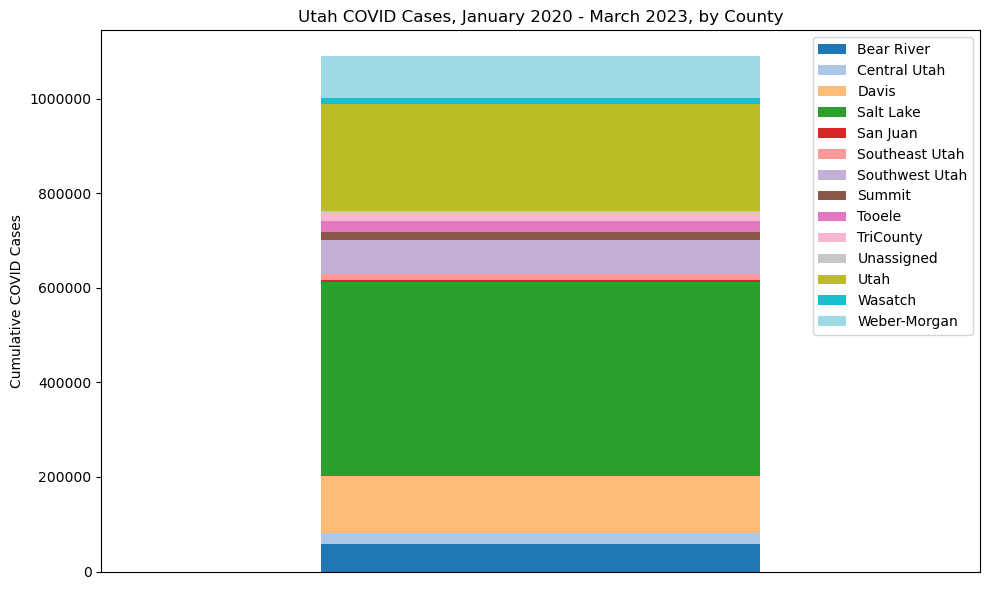

In [84]:
#%% viz 4
viz4 = utah_counties[['2023-03-09']] #filter to just the final cumulative count of cases
viz4 = viz4.T 
viz4 = viz4.loc[:, (viz4 !=0).any(axis=0)] #a lot of these are 0 so that's odd but we'll get rid of them

plt.figure(figsize = (3,10))
viz4.plot(kind='bar', stacked=True, figsize=(10,6), colormap = 'tab20') #use a colormap with more colors

plt.ylabel('Cumulative COVID Cases')
plt.title('Utah COVID Cases, January 2020 - March 2023, by County')
plt.ticklabel_format(style='plain', axis='y') #get it out of scientific notation
plt.xticks([]) #hide x-axis labels because date doesn' tell us anything
plt.legend()
plt.tight_layout()
plt.show()
